# KALEEM WAHEED  18l-1811 Project Part A and B


### Import Libraries

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

C:\Users\Sh-Ma\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%config IPCompleter.greedy=True

In [3]:
from time import time
import matplotlib.pyplot as plt
import matplotlib
from keras.callbacks import TensorBoard

In [4]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Part B - Tensorboard
#### Building Convolutional Neural Network 

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

### compile Model

In [6]:
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
#tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


### Fit Model and Compute Accuracy Score 
### keras.callbacks.TensorBoard

In [7]:
#tensor_board = TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)
#callback=[keras.callbacks.TensorBoard(log_dir="/tmp/mnist/2".format(time()), histogram_freq=1, write_graph=True, write_images=True)]
HistoryOfModel = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[keras.callbacks.TensorBoard(log_dir="./Graph".format(time()), histogram_freq=1, write_graph=True, write_images=True)]
         )
score = model.evaluate(x_test, y_test, verbose=0)
#tensorboard --logdir ./Graph
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.3975 - acc: 0.8715 - val_loss: 0.1307 - val_acc: 0.9596
Epoch 2/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.1016 - acc: 0.9688 - val_loss: 0.0664 - val_acc: 0.9793
Epoch 3/10
60000/60000 [==============================] - 22s 368us/step - loss: 0.0735 - acc: 0.9778 - val_loss: 0.0736 - val_acc: 0.9770
Epoch 4/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.0590 - acc: 0.9822 - val_loss: 0.0640 - val_acc: 0.9807
Epoch 5/10
60000/60000 [==============================] - 20s 329us/step - loss: 0.0480 - acc: 0.9850 - val_loss: 0.0497 - val_acc: 0.9854
Epoch 6/10
60000/60000 [==============================] - 20s 339us/step - loss: 0.0416 - acc: 0.9873 - val_loss: 0.0498 - val_acc: 0.9853
Epoch 7/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.0363 - acc: 0.9887 - val_loss: 0.

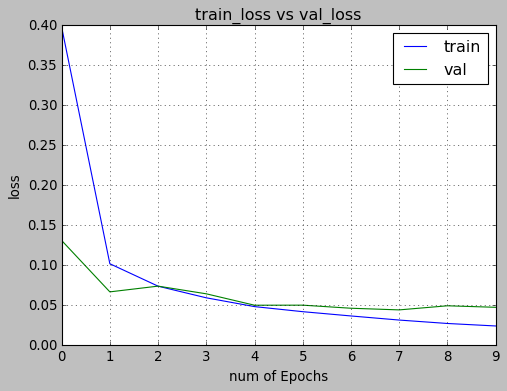

In [13]:
train_loss=HistoryOfModel.history['loss']
val_loss=HistoryOfModel.history['val_loss']
train_acc=HistoryOfModel.history['acc']
val_acc=HistoryOfModel.history['val_acc']
xc=range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

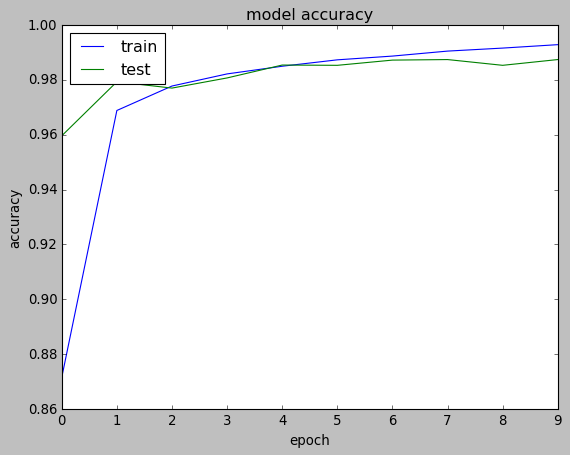

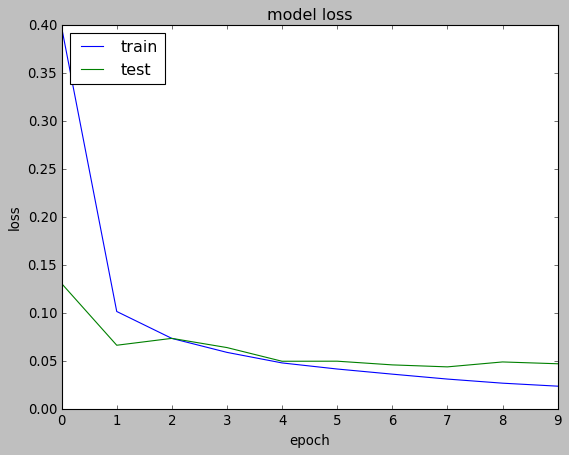

In [12]:
# Plot history for accuracy
plt.plot(HistoryOfModel.history['acc'])
plt.plot(HistoryOfModel.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Plot history for loss
plt.plot(HistoryOfModel.history['loss'])
plt.plot(HistoryOfModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()